We try to identify the areas of interests of the users based on their phone usage, day of the week and time of the day on which they are using it.

Analysis based on the following assumption
On Weekends:
  1. People probably don't go into work
  2. They probably sleep in late on Saturday
  3. They probably run a bunch of random errands, since they couldn't during the week
  4. They should be home, at least during the very late hours, e.g. 1-4 AM

By making use of de-anonmized CDR data and the above assumptions, we find the predictable manners of users moving from home to work with a few errands in between. We then run a K-Means model on the data to isolate the geolocations where a user spends most of his/her time.

This also gives a good use case to understand exactly how useful is telephone metadata. 

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
matplotlib.style.use('ggplot') # Look Pretty
import os

In [2]:
df = pd.read_csv("Datasets\\CDR.csv", sep = ",", header = 0)
print(df.head())

df.CallDate = pd.to_datetime(df.CallDate, errors = 'coerce')
df.CallTime = pd.to_timedelta(df.CallTime, errors = 'coerce')

#
# Getting a distinct list of "In" phone numbers
#
inphono = df.In.unique()

           In         Out Direction    CallDate         CallTime  DOW  \
0  4638472273  2666307251  Incoming  2010-12-25  07:16:24.736813  Sat   
1  4638472273  1755442610  Incoming  2010-12-25  21:18:30.053710  Sat   
2  4638472273  5481755331  Incoming  2010-12-25  14:52:42.878016  Sat   
3  4638472273  1755442610  Incoming  2010-12-25  16:02:09.001913  Sat   
4  4638472273  2145623768  Incoming  2010-12-25  15:28:35.028554  Sat   

         Duration                               TowerID   TowerLat   TowerLon  
0  0:02:41.741499  0db53dd3-eb9c-4344-abc5-c2d74ebc3eec  32.731611 -96.709417  
1  0:02:47.108750  aeaf8b43-8034-44fe-833d-31854a75acbf  32.731722 -96.709500  
2  0:04:35.356341  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944 -96.910389  
3  0:02:23.498499  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944 -96.910389  
4  0:03:54.692497  95d7920d-c3cd-4d20-a568-9a55800dc807  32.899944 -96.910389  


In [3]:
# 
# Creating a function that filters and plots data for each of the 10 users
#
def filter_plot(i):
    user1 = df[df.In == inphono[i]]

    # PLotting all the call locations
    user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title=(str(('Call Locations for user '+str(i)))))


    # Examining records that came in on weekends (sat/sun).
    user1 = user1.loc[user1['DOW'].isin(['Sat', 'Sun'])]

    
    #
    # Filtering it down for calls that came in either before 6AM OR after 10pm (22:00:00).
    user1 = user1.loc[(user1['CallTime']<'06:00:00')|(user1['CallTime']>'22:00:00')]
    print("Number of Records: ",len(user1))


    # In the plot it's likely that wherever records are bunched up it is probably near where the
    # caller's residence is
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
    ax.set_title(str('Weekend Calls between 10pm to 6am for user '+ str(i)))



    #
    # Running K-Means with a K=1. There really should only be a single area of concentration. If there isn't
    # and multiple areas are "hot", then we'll run with K=2, with the goal being that one of the centroids will
    # sweep up the annoying outliers
    user1 = pd.concat([user1.TowerLon, user1.TowerLat], axis = 1)
    kmeans = KMeans(n_clusters = 1)
    kmeans.fit(user1)
    labels = kmeans.predict(user1)
    centroids = kmeans.cluster_centers_
    print("Cluster Center: ",centroids)
    print("Phone Number: ",inphono[i])
    
    #Printing out the centroid locations and add them onto the scatter plot.
    ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x', s = 100)

Number of Records:  28
Cluster Center:  [[-96.70839404  32.73299989]]
Phone Number:  4638472273


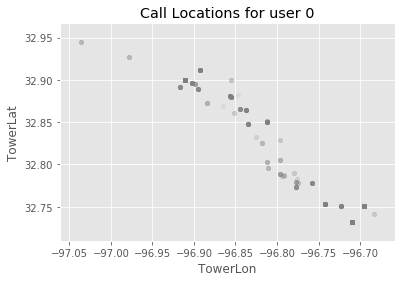

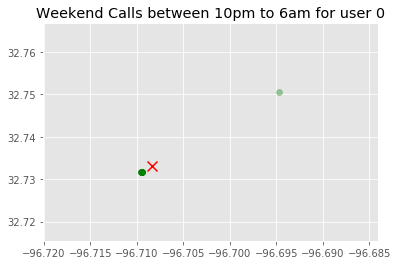

In [4]:
filter_plot(0)

Number of Records:  103
Cluster Center:  [[-96.92355165  32.87097035]]
Phone Number:  1559410755


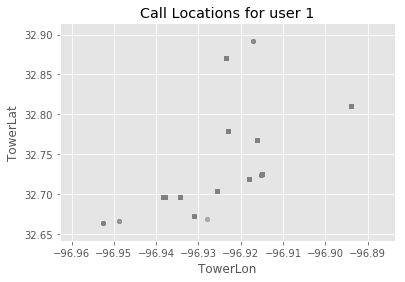

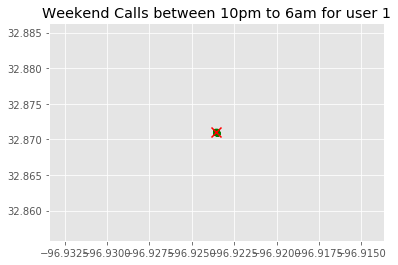

In [5]:
filter_plot(1)

Number of Records:  23
Cluster Center:  [[-96.86526087  32.86557287]]
Phone Number:  4931532174


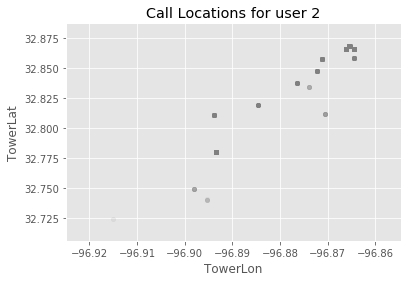

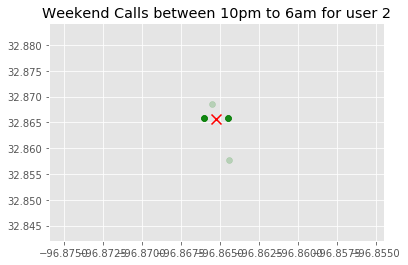

In [6]:
filter_plot(2)

Number of Records:  28
Cluster Center:  [[-96.83577361  32.84688271]]
Phone Number:  2419930464


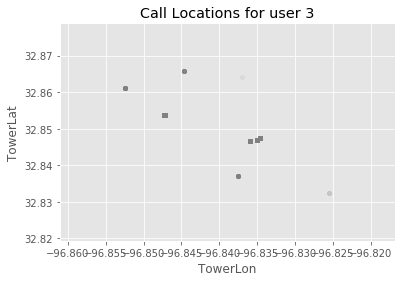

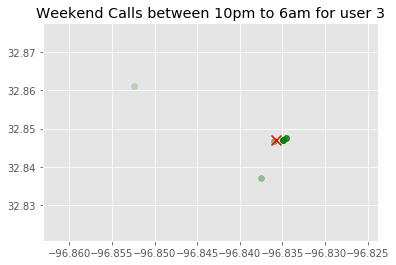

In [7]:
filter_plot(3)

Number of Records:  23
Cluster Center:  [[-96.73155696  32.87684057]]
Phone Number:  1884182865


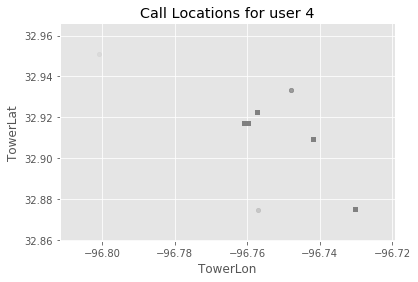

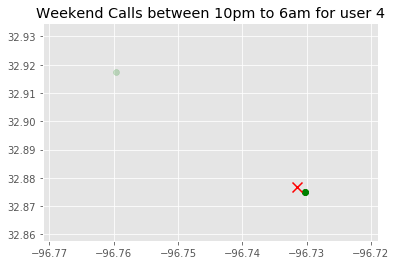

In [8]:
filter_plot(4)

Number of Records:  18
Cluster Center:  [[-96.685556  32.770833]]
Phone Number:  3688089071


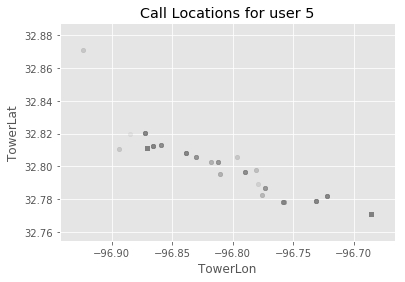

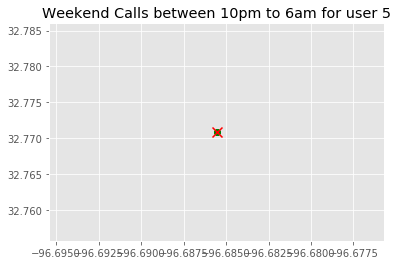

In [9]:
filter_plot(5)

Number of Records:  12
Cluster Center:  [[-96.84065775  32.70437017]]
Phone Number:  4555003213


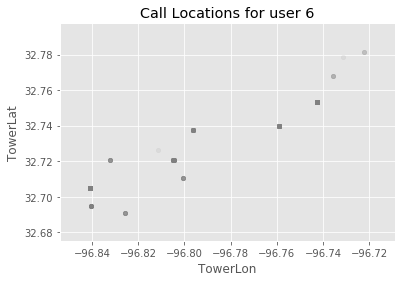

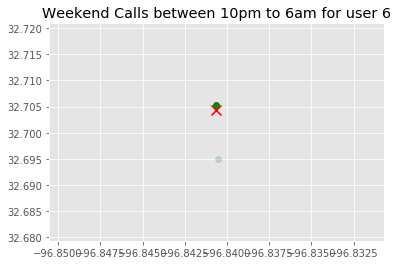

In [10]:
filter_plot(6)

Number of Records:  50
Cluster Center:  [[-96.604444  32.703056]]
Phone Number:  2068627935


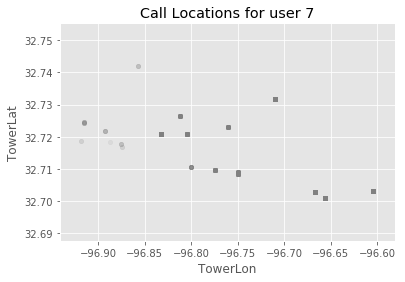

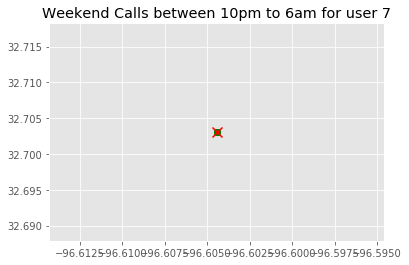

In [11]:
filter_plot(7)

Number of Records:  108
Cluster Center:  [[-96.81476225  32.77267817]]
Phone Number:  2894365987


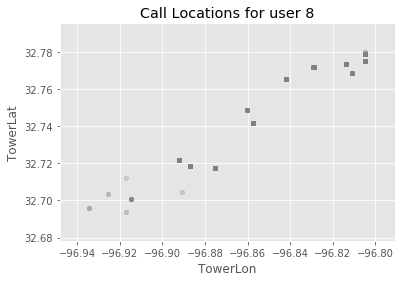

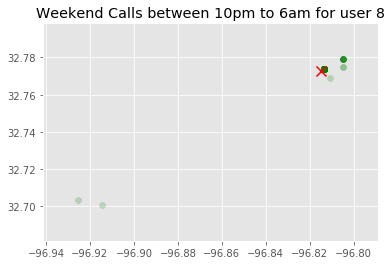

In [12]:
filter_plot(8)

Number of Records:  64
Cluster Center:  [[-96.78028103  32.77609108]]
Phone Number:  8549533077


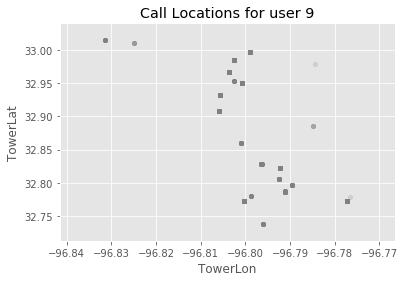

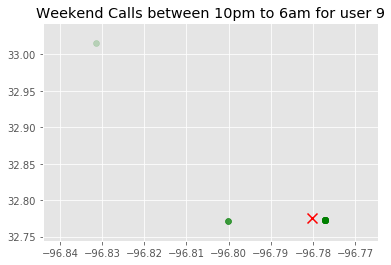

In [13]:
filter_plot(9)